# Lab 1: Regression Air Quality

### Problem:

Humans are very sensitive to humidity, as the skin relies on the air to get rid of moisture. The process of sweating is your body's attempt to keep cool and maintain its current temperature. If the air is at 100% relative humidity, sweat will not evaporate into the air. As a result, we feel much hotter than the actual temperature when the relative humidity is high. If the relative humidity is low, we can feel much cooler than the actual temperature because our sweat evaporates easily, cooling us off. 
The humidity of the air, if it is not maintained at optimal levels, can be a factor that has adverse affects on people's health. According to reports, the human body is said to be most comfortable when the relative humidity of the area ranges between 20 and 60%.

### Objective

We **investigate the change of the Relative Humidity (RH)** by finding the correlation between the RH values and the all other attributes.

### Dataset: Air quality

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer [1].

**Attributes of the dataset are:**

|Sl No| Attribute| Description|
|-| -| -|
|0| Date| Date (DD/MM/YYYY)|
|1| Time| Time (HH.MM.SS)|
|2| CO(GT)| True hourly averaged concentration CO in mg/m^3 (reference analyzer)|
|3| PT08.S1(CO)| PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)|
|4| NMHC(GT) |True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)|
|5| C6H6(GT)| True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)|
|6| PT08.S2(NMHC)| PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)|
|7| NOx(GT)| True hourly averaged NOx concentration in ppb (reference analyzer)|
|8| PT08.S3(NOx)| PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)|
|9| NO2(GT)| True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)|
|10| PT08.S4(NO2)| PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)|
|11| PT08.S5(O3)| PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)|
|12| T| Temperature in C|
|13| RH| Relative Humidity (%)|
|14| AH| AH Absolute Humidity|

### General Announcements

* The exercises on this sheet are graded by a maximum of **20 points**. You will be asked to implement several functions.
* Team work is not allowed! Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not. 
* If you use any code fragments found on the Internet, make sure you reference them properly.
* You can send your questions via email to the TAs until the deadline. We usually work durning normal work hours therefore don't expect us to answer emails in the night before the deadline.

### <u>Grading:<u>

[1) Load data ](#load_data) (1 points)
    
[2) Data Cleaning](#hr) (3 points)
    
[3) Correlation between variables](#corr)  (2 points)
    
[4) Influence of features on output-RH](#lin) (2 points)

[5) Baseline Linear Regression](#LR)  (4 points)

[6) Feature Engineering and testing model](#FE)  (2 points)

[7) Decision Tree Regression ](#DT) (1 point)

[8) Random Forest Regression](#RF) (2 point)

[8.1) Blox plot](#bxplot) (2 points)
    
[9) Support Vector Machine](#SVM) (1 point)

### References:
[1] S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario, Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005

In [1]:
# Importing the Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
## Changed to notebook to allow for correct colors in dark mode

from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 10, 8

#### 1) Load data<a name="load_data"></a> (1 point)


- Use `pandas.read_csv('path/to/dataset.csv',header=None,skiprows=1,names=col,na_filter=True, na_values=-200,usecols=use)` to load the data.

In [2]:
# Defining header
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

# Defining number of columns from csv
use = list(np.arange(len(col)))

# Reading the data from csv
df_air = pd.read_csv('Datasets/AirQualityUCI.csv',header=None,skiprows=1,names=col, na_filter=True, na_values=-200,usecols=use)


In [3]:
# Format date column (See: https://docs.python.org/3/library/datetime.html) always a good idea for dates
df_air['DATE'] = pd.to_datetime(df_air.DATE, format='%m/%d/%Y')

- Show the first and the last 7 rows of the data.

In [4]:
print(df_air.head(7))

        DATE      TIME  CO_GT  PT08_S1_CO  NMHC_GT  C6H6_GT  PT08_S2_NMHC  \
0 2004-03-10  18:00:00    2.6      1360.0    150.0     11.9        1046.0   
1 2004-03-10  19:00:00    2.0      1292.0    112.0      9.4         955.0   
2 2004-03-10  20:00:00    2.2      1402.0     88.0      9.0         939.0   
3 2004-03-10  21:00:00    2.2      1376.0     80.0      9.2         948.0   
4 2004-03-10  22:00:00    1.6      1272.0     51.0      6.5         836.0   
5 2004-03-10  23:00:00    1.2      1197.0     38.0      4.7         750.0   
6 2004-03-11   0:00:00    1.2      1185.0     31.0      3.6         690.0   

   NOX_GT  PT08_S3_NOX  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  
0   166.0       1056.0   113.0       1692.0      1268.0  13.6  48.9  0.7578  
1   103.0       1174.0    92.0       1559.0       972.0  13.3  47.7  0.7255  
2   131.0       1140.0   114.0       1555.0      1074.0  11.9  54.0  0.7502  
3   172.0       1092.0   122.0       1584.0      1203.0  11.0  60.0  0.

In [5]:
print(df_air.tail(7))

     DATE TIME  CO_GT  PT08_S1_CO  NMHC_GT  C6H6_GT  PT08_S2_NMHC  NOX_GT  \
9464  NaT  NaN    NaN         NaN      NaN      NaN           NaN     NaN   
9465  NaT  NaN    NaN         NaN      NaN      NaN           NaN     NaN   
9466  NaT  NaN    NaN         NaN      NaN      NaN           NaN     NaN   
9467  NaT  NaN    NaN         NaN      NaN      NaN           NaN     NaN   
9468  NaT  NaN    NaN         NaN      NaN      NaN           NaN     NaN   
9469  NaT  NaN    NaN         NaN      NaN      NaN           NaN     NaN   
9470  NaT  NaN    NaN         NaN      NaN      NaN           NaN     NaN   

      PT08_S3_NOX  NO2_GT  PT08_S4_NO2  PT08_S5_O3   T  RH  AH  
9464          NaN     NaN          NaN         NaN NaN NaN NaN  
9465          NaN     NaN          NaN         NaN NaN NaN NaN  
9466          NaN     NaN          NaN         NaN NaN NaN NaN  
9467          NaN     NaN          NaN         NaN NaN NaN NaN  
9468          NaN     NaN          NaN         NaN NaN NaN

- Print the dtypes in the dataframe 

In [6]:
print(df_air.dtypes)

DATE            datetime64[ns]
TIME                    object
CO_GT                  float64
PT08_S1_CO             float64
NMHC_GT                float64
C6H6_GT                float64
PT08_S2_NMHC           float64
NOX_GT                 float64
PT08_S3_NOX            float64
NO2_GT                 float64
PT08_S4_NO2            float64
PT08_S5_O3             float64
T                      float64
RH                     float64
AH                     float64
dtype: object


- Print dataframe shape (Number of Columns and Rows) 

In [7]:
print(df_air.shape)

(9471, 15)


- Print dataframe statistics (mean, max & min values for each column etc.)

NOTE: You can print with a single method.

In [8]:
print(df_air.describe())

             CO_GT   PT08_S1_CO      NMHC_GT      C6H6_GT  PT08_S2_NMHC  \
count  7674.000000  8991.000000   914.000000  8991.000000   8991.000000   
mean      2.152750  1099.833166   218.811816    10.083105    939.153376   
std       1.453252   217.080037   204.459921     7.449820    266.831429   
min       0.100000   647.000000     7.000000     0.100000    383.000000   
25%       1.100000   937.000000    67.000000     4.400000    734.500000   
50%       1.800000  1063.000000   150.000000     8.200000    909.000000   
75%       2.900000  1231.000000   297.000000    14.000000   1116.000000   
max      11.900000  2040.000000  1189.000000    63.700000   2214.000000   

            NOX_GT  PT08_S3_NOX       NO2_GT  PT08_S4_NO2   PT08_S5_O3  \
count  7718.000000  8991.000000  7715.000000  8991.000000  8991.000000   
mean    246.896735   835.493605   113.091251  1456.264598  1022.906128   
std     212.979168   256.817320    48.370108   346.206794   398.484288   
min       2.000000   322.000

#### 2) Data Cleaning<a name="hr"></a> (3 points)

- Drop all rows **ONLY** containing NaN (not a number) for **ALL** values
- Print the resulting shape

NOTE: you can use in place `inplace=True` (See: https://www.geeksforgeeks.org/what-does-inplace-mean-in-pandas/)

In [9]:
df_air.dropna(axis=0, how='all', inplace=True)

- Now, drop **ONLY** rows with the threshold equals to 10 NaN values
- Print dataframe shape (how many cols & rows)

In [10]:
df_air.dropna(axis=0, inplace=True, thresh=10)

- Print the number of missing values per column?

In [11]:
print(df_air.isnull().sum(axis=0))

DATE               0
TIME               0
CO_GT           1647
PT08_S1_CO         0
NMHC_GT         8104
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
dtype: int64


We want to fill the missing value with the following strategies:

CO_GT, NOX_GT, NO2_GT will be filled by monthly average of that particular hour

NHHC_GT will be dropped as it has 90% missing data

 - Split hour from 'TIME' into new column named 'HOUR' (See: https://docs.python.org/3/library/stdtypes.html#string-methods)

In [12]:
# Use Regex groups to extract the components of the time
df_time = df_air.TIME.str.extract(pat=r"(?P<HOUR>\d{1,2}):(?P<MINUTE>\d{1,2}):(?P<SECOND>\d{1,2})")

df_air["HOUR"] = pd.to_numeric(df_time.HOUR, downcast='integer')


- add the 'MONTH' column to the dataset you can get the month from the 'DATE' column

In [13]:
df_air["MONTH"] = pd.DatetimeIndex(df_air["DATE"]).month

- Drop column NMHC_GT; it has 90% missing data

In [14]:
df_air.drop(columns="NMHC_GT", inplace=True)

Fill NaN values with monthly average of particular hour  

(See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

In [15]:
# Calculate the averages by `MONTH` and `HOUR`
hourly_averages_by_month = df_air.groupby(["MONTH", "HOUR"])[["CO_GT", "NOX_GT", "NO2_GT"]].mean()

# Set the index of df to `MONTH` and `HOUR`
df_air["original_index"] = df_air.index
df_air.set_index(["MONTH", "HOUR"], inplace=True, drop=False)

# Replace the missing NaN values with the corresponding averages
df_air["CO_GT"].fillna(value=hourly_averages_by_month["CO_GT"], inplace=True)
df_air["NOX_GT"].fillna(value=hourly_averages_by_month["NOX_GT"], inplace=True)
df_air["NO2_GT"].fillna(value=hourly_averages_by_month["NO2_GT"], inplace=True)


df_air.set_index("original_index", inplace=True, drop=True)
df_air.index.name = None
df_air

,DATE,TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR,MONTH
0,2004-03-10,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,3
1,2004-03-10,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,3
2,2004-03-10,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,3
3,2004-03-10,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,3
4,2004-03-10,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,10,4
9353,2005-04-04,11:00:00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,11,4
9354,2005-04-04,12:00:00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,12,4
9355,2005-04-04,13:00:00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,13,4


- Print missing values per column

In [16]:
print(df_air.isnull().sum(axis=0))

DATE              0
TIME              0
CO_GT            30
PT08_S1_CO        0
C6H6_GT           0
PT08_S2_NMHC      0
NOX_GT          261
PT08_S3_NOX       0
NO2_GT          261
PT08_S4_NO2       0
PT08_S5_O3        0
T                 0
RH                0
AH                0
HOUR              0
MONTH             0
dtype: int64


- Fill the remaining NaN values with hourly average value

In [17]:
hourly_averages = df_air.groupby(["HOUR"])[["CO_GT", "NOX_GT", "NO2_GT"]].mean()

df_air["original_index"] = df_air.index
df_air.set_index(["HOUR"], inplace=True, drop=False)

df_air["CO_GT"].fillna(value=hourly_averages["CO_GT"], inplace=True)
df_air["NOX_GT"].fillna(value=hourly_averages["NOX_GT"], inplace=True)
df_air["NO2_GT"].fillna(value=hourly_averages["NO2_GT"], inplace=True)

df_air.set_index("original_index", inplace=True, drop=True)
df_air.index.name = None
df_air

# Clean up additional columns
df_air.drop(["HOUR", "MONTH"], axis=1, inplace=True)

- Print missing values per column

In [18]:
print(df_air.isnull().sum(axis=0))

DATE            0
TIME            0
CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
dtype: int64


#### 3) Understand correlation between variables<a name="corr"></a> (2 points)
- Use heatmap to see correlation between variables (depending on your pandas version you might need to drop the non number columns)

<AxesSubplot: >

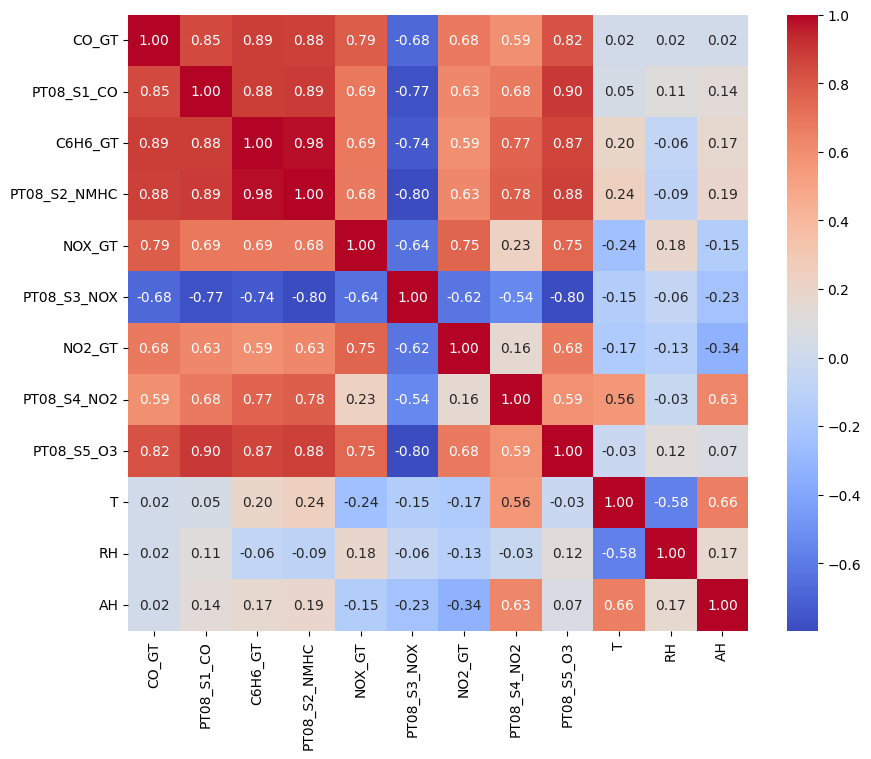

In [19]:
df_air_corr = df_air.drop(["DATE", "TIME"], axis=1, inplace=False).corr()
sns.heatmap(df_air_corr, cmap="coolwarm", annot=True, fmt="0.2f")

 - Describe the heatmap using your own words

ANSWER: 
The dataset displays (mostly) very weak correlation between Temperature, Relative Humidity, and Absolute Humidity and the other measurements. An exception is `PT08_S4_NO2` which is moderately correlated with Temperature and Absolute Humidity. In addition Temperature shows a strong correlation to Relative Humidity (negative correlation) and Absolute Humidity.
For the other measurements it is observable that they are mostly strongly correlated among each other, with `PT08_S3_NOx` (tungsten oxide) being strongly negatively correlated. The exception again being `PT08_S4_NO2` which displays only weak correlation with `NOX_GT` and `NO2_GT`.

#### 4) Try to understand degree of linearity between RH output and other input features<a name="lin"></a>  (2 points)
 - plot all features (x-axis) against output variable RH(y-axis) using `sns.lmplot` (use a for-loop)

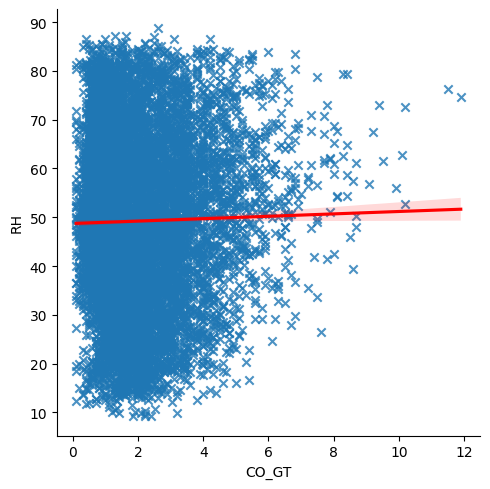

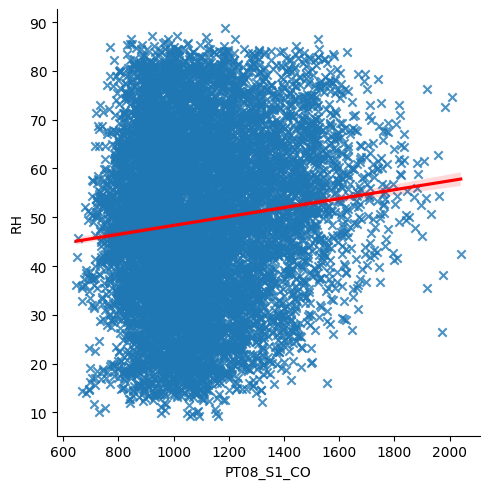

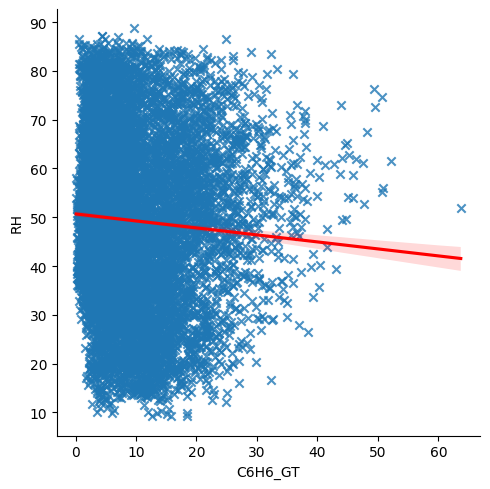

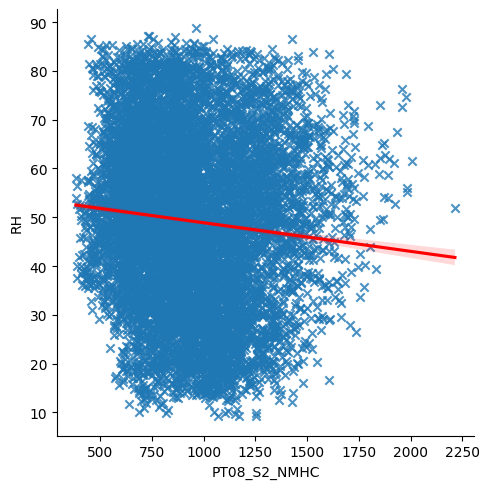

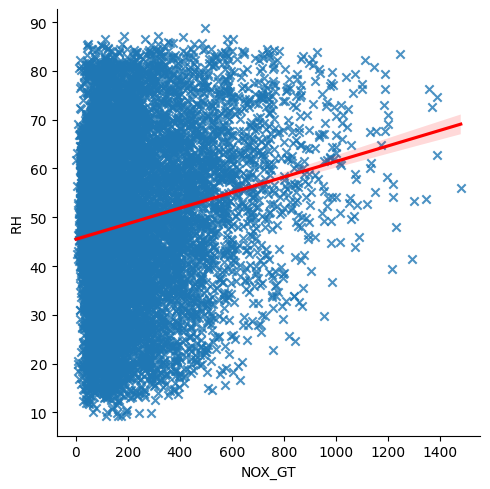

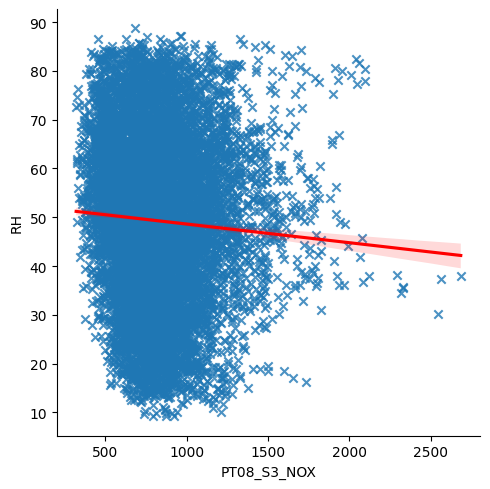

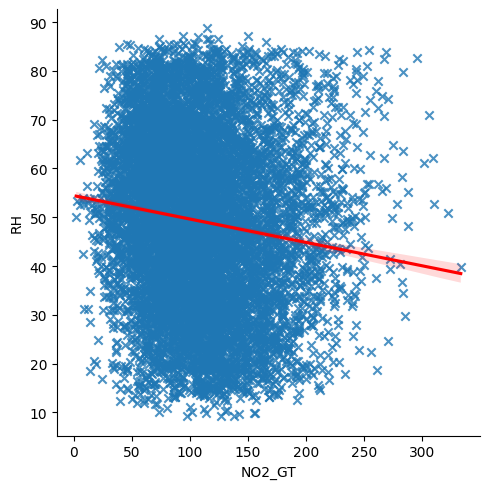

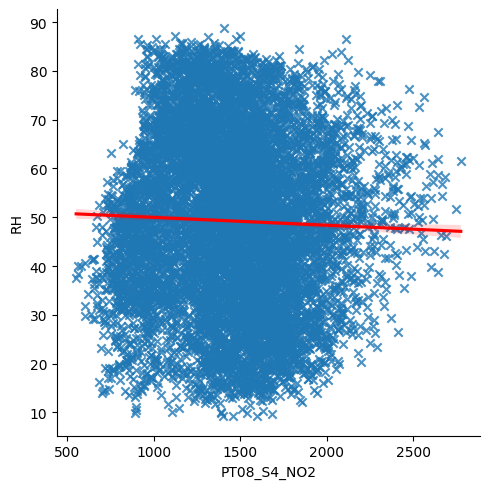

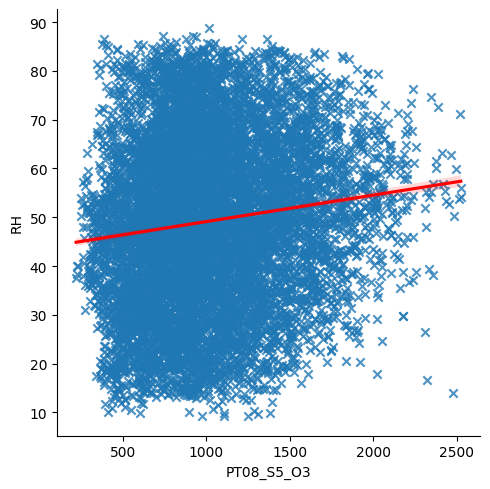

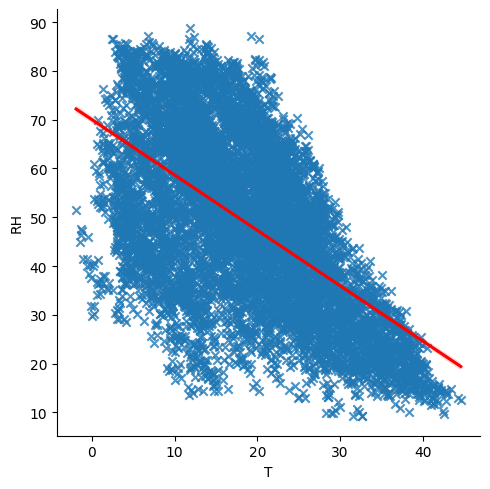

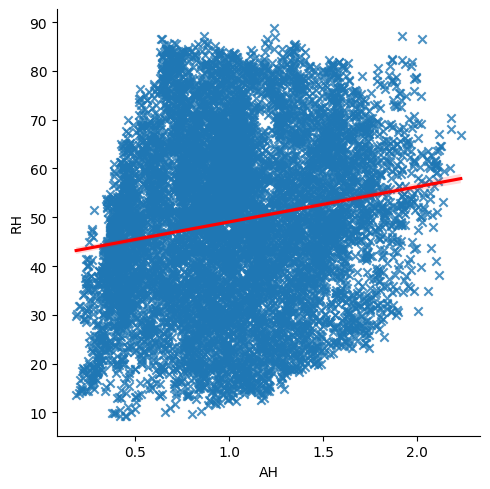

In [20]:
# Note to TAs: This needed to be run separately to actually populate the figures

for column in df_air.drop(["DATE", "TIME", "RH"], axis=1, inplace=False).columns:
    sns.lmplot(data=df_air, x=column, y="RH", markers="x", line_kws=dict(color="r"))

- describe the results

ANSWER: 
The function `seaborn.lmplot` fits a simple linear regression model to the data and displays it and the 95% confidence interval. We can for instance see that `T`, compared to all other variables, displays in its slope the strongest (negative) correlation with `RH` (as previously seen in the heatmap). In addition, for all plots, we can see that the 95% confidence interval gets larger for regions with fewer measurement values.

### 5) Linear Regression<a name="LR"></a>  (4 points)

In [21]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

- Define Feature (X) and Target (y)

NOTE: Check the objective of the lab.

In [22]:
# your code
X = df_air.drop(["DATE", "TIME", "RH"], axis=1, inplace=False).to_numpy() # The features (input variables)
y = df_air["RH"].to_numpy()  # The targets

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (8991, 11)
Shape of y: (8991,)


- Plot distribution of target variable as a histogram.

<AxesSubplot: ylabel='Count'>

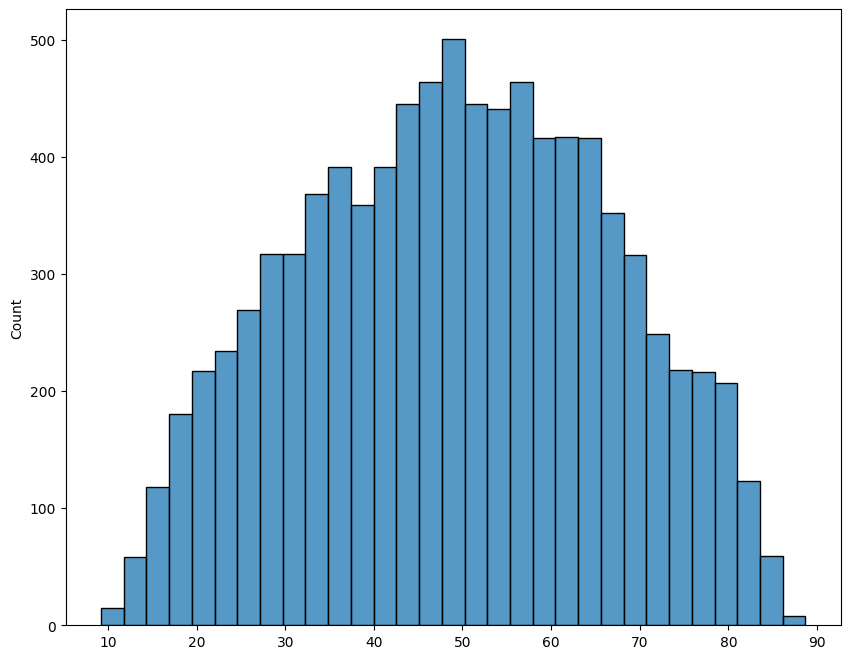

In [23]:
plt.figure()
sns.histplot(y)

- Split the data into train and test with test size and 30% and train size as 70%, use a random seed.
- Print the number of train and test samples.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Number of train samples: {y_train.shape[0]:d}\r\nNumber of test samples: {y_test.shape[0]:d}")

Number of train samples: 6293
Number of test samples: 2698


- Normalize data using `StandardScaler`

IMPORTANT: 
- Be careful about which data you are allowed to use for normalization.
- **DO NOT** forget to use the normalization for the different models (SVR etc.) !!

In [25]:
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

 - Train the Linear Regression model
 
 See: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [26]:
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
# print(f"Score: {lin_reg.score(X_test_scaled, y_test):0.2f}")

- Print intercept and slope of the linear model

NOTE: There are more than one slopes, print them in a for loop with the corresponding variable name.

In [27]:
print(f"Intercept: {lin_reg.intercept_}")
for i, column in enumerate(df_air.drop(["DATE", "TIME", "RH"], axis=1, inplace=False).columns):
    print(f"{column:<12}: {lin_reg.coef_[i]:+6.2f}")

Intercept: 49.17484506594617
CO_GT       :  -1.52
PT08_S1_CO  :  +2.25
C6H6_GT     :  -5.98
PT08_S2_NMHC:  +0.34
NOX_GT      :  +4.19
PT08_S3_NOX :  -0.21
NO2_GT      :  -1.96
PT08_S4_NO2 :  +5.93
PT08_S5_O3  :  -0.63
T           : -20.23
AH          : +13.05


- Predict on the test data
- Compute and print performance metrics as RMSE. 

This will be our baseline.

In [28]:
print(f"RMSE: {mean_squared_error(y_test, lin_reg.predict(X_test_scaled), squared=False):0.2f}")  
# For newer versions of scikit-learn use root_mean_squared_error!


RMSE: 6.10


- Write a conclusion about the linear regression model.

ANSWER:
The strong relationship between `RH` and the variables `T` and `AH` is shown by the large (in absolute terms) coefficients.

### 6) Feature engineering and testing model:<a name="FE"></a>  (2 points)

Try with multiple feature combination and see if RMSE is improving

- Write function to measure RMSE with different combinations of features

NOTE: Check the comments of the function.

In [29]:
def train_test_RMSE(my_df, feat_):    
    """
    The function train_test_RMSE returns the RMSE for different combinations 
    of features feat_ of the dataframe df_air.
    
        :param my_df: (pandas.DataFrame) Our dataset
        :param feat_: (List[str]) A list of column names
        :return: (float) The RMSE score value
    """
    X = my_df[feat_].to_numpy()
    y = my_df["RH"].to_numpy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    X_scaler = StandardScaler()
    X_train_scaled = X_scaler.fit_transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    
    lin_reg = LinearRegression().fit(X_train_scaled, y_train)
    
    y_pred = lin_reg.predict(X_test_scaled)

    return mean_squared_error(y_test, y_pred, squared=False)

- Train 3 models with different combination of inputs.
- Try to find the 6 variable combination that gives the best score.

In [30]:
# trial 1
feature_list = ["T", "NOX_GT", "AH"]
train_test_RMSE(df_air, feature_list)

6.449454291901296

In [31]:
# trial 2
feature_list = ["NOX_GT", "AH", "PT08_S1_CO"]
train_test_RMSE(df_air, feature_list)

16.859128757743424

In [32]:
# trial 3
# feature_list = df_air.drop(["DATE", "TIME", "RH", "T"], axis=1).columns
feature_list = ["CO_GT", "PT08_S4_NO2", "C6H6_GT"]
train_test_RMSE(df_air, feature_list)

17.05681909493901

In [33]:
# trial 4
feature_list = df_air.drop(["DATE", "TIME", "RH", "T"], axis=1).columns
# feature_list = ["CO_GT", "PT08_S4_NO2", "C6H6_GT"]
train_test_RMSE(df_air, feature_list)

12.87092833652359

- Comment on the results 

Hint: Is there a relationship between the score and the heatmap? If so, why?

ANSWER:
The combination of the three variables with the strongest correlation (trial 1) performs slightly worse than our baseline with all variables. We can see that removing `T` from the regression degrades the RMSE results by a factor of 2 (trial 2 and trial 4), and only marginally outperforms the combination of the three variables with the weakest correlation (compare trial 2 and 3).
These observations match with the definition of correlation (which was the basis for the heatmap) which is a measure of dependence between two (random) variables and their predictive relationship.

### 7) Decision Tree Regression<a name="DT"></a>  (1 points)

Let us try to apply Decision tree regression technique and see if any improvement happens

In [34]:
from sklearn.tree import DecisionTreeRegressor         # Decision tree regression model
from sklearn.model_selection import cross_val_score    # Import cross validation score package
from sklearn.model_selection import GridSearchCV       # Import grid search cv

from sklearn import tree

- Fit the DT model and predict.
- Print the score of the model.

In [35]:
dtree = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(dtree, X_train_scaled, y_train, verbose=5)
print(f"Result of cross validation with {len(scores):d} interations: Mean coefficient of determination {scores.mean():0.2f} with standard deviation {scores.std():0.3f}")

dtree.fit(X_train_scaled, y_train)

y_pred = dtree.predict(X_test_scaled)
print(f"RMSE of withheld test data: {mean_squared_error(y_test, y_pred, squared=False):0.2f}")


[CV] END ................................ score: (test=0.992) total time=   0.0s
[CV] END ................................ score: (test=0.992) total time=   0.0s
[CV] END ................................ score: (test=0.993) total time=   0.0s
[CV] END ................................ score: (test=0.993) total time=   0.0s
[CV] END ................................ score: (test=0.993) total time=   0.0s
Result of cross validation with 5 interations: Mean coefficient of determination 0.99 with standard deviation 0.000
RMSE of withheld test data: 1.38


In [36]:
# plt.figure()
# _ = tree.plot_tree(dtree, feature_names=df_air.drop(["DATE", "TIME", "RH"], axis=1, inplace=False).columns, filled=True, max_depth=5)

In [37]:
# text_representation = tree.export_text(dtree)
# print(text_representation)

- Write the comment on the results. Compare with the previous ones.

ANSWER:
The RMSE on the withheld test data got smaller by a factor of 4. The DecisionTree can regress the non-linearities in the data much better.

### 8) Random Forest Regression<a name="RF"></a>  (2 points)

- apply Random Forest regression and measure RMSE

In [38]:
from sklearn.ensemble import RandomForestRegressor

- Fit the RF model and predict 
- print the score

In [39]:
rfregr = RandomForestRegressor(random_state=42)
rfregr.fit(X_train_scaled, y_train)
y_pred = rfregr.predict(X_test_scaled)
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):0.4f}")

RMSE: 0.6741


- Try to improve on baseline RF model: use `GridSearchCV` 

To search between different hyperparameters and plot the resulting RMSE:
- use different numbers of estimators
- use cv of 5 or 10
- use the correct scoring function
- then, use the best model hyperparameters to predict on the test data

In [40]:
parameters = {
    "n_estimators": [50, 100, 200, 400],
    "max_depth": [5, 10, 50]
}

clf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, cv=10, n_jobs=-1, verbose=5, scoring='neg_mean_squared_error')

clf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 50],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='neg_mean_squared_error', verbose=5)

In [41]:
print(clf.best_params_)

regr = clf.best_estimator_
y_pred = regr.predict(X_test_scaled)

print(f"RMSE of withheld test data: {mean_squared_error(y_test, y_pred, squared=False):0.4f}")

{'max_depth': 50, 'n_estimators': 200}
RMSE of withheld test data: 0.6693


- Write here your conclusions regarding the Grid Search method. Did the performance improve? How much? 

ANSWER:
The random forest outperforms the decision tree again by a factor of two through ensembling. The GridSearchCV showed that by increasing the number of trees in the ensemble, we can achieve marginal improvements in the RMSE.

- ### 8.1 Plot box plots of the error <a name="bxplot"></a>  (2 points)
    - Plot the box plots of absolute errors vs different output range. 
        - You can choose 3 intervals.
        - Then, you need to calculate the errors for each sample in the intervals.
        - Use `sns.boxplot` to plot the errors.  

<AxesSubplot: xlabel='ABS_ERROR', ylabel='INTERVAL'>

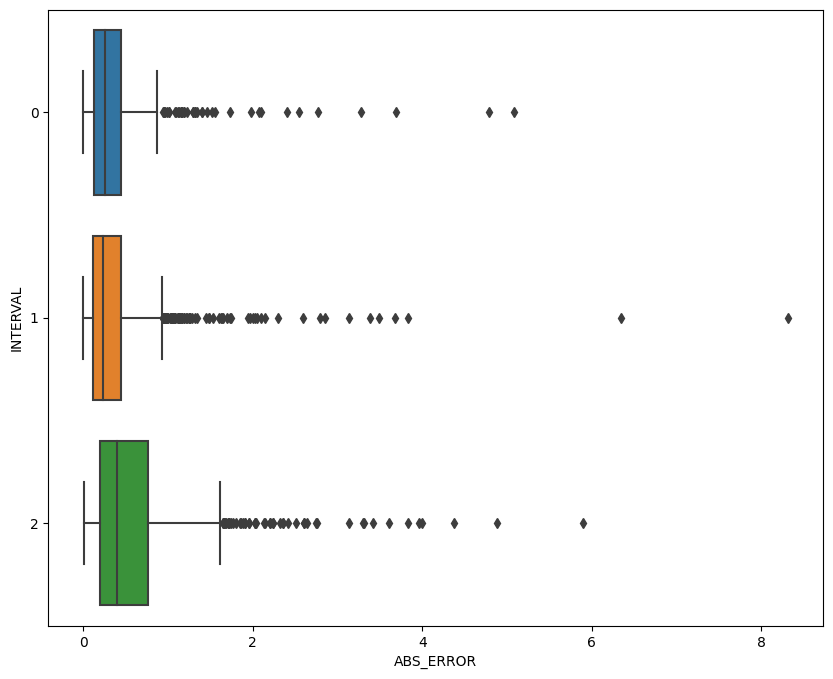

In [42]:
y_abs_error = np.vstack((y_test, (y_test * 3) // 100, np.abs(y_test - y_pred))).T  # Generate exclusive intervals 0% to 33%, 33% to 66%, and 66% to 100%


# df_abs_error = pd.DataFrame(data=y_abs_error, columns=['RH', 'ABS_ERROR']).set_index('RH').groupby(by= (lambda x: (x*3)//100))
df_abs_error = pd.DataFrame(data=y_abs_error, columns=['RH', 'INTERVAL', 'ABS_ERROR']).set_index('RH')

df_abs_error["INTERVAL"] = df_abs_error["INTERVAL"].astype(int).astype("category")

plt.figure()
sns.boxplot(data=df_abs_error, x="ABS_ERROR", y="INTERVAL")

- How are the error distributed over different ranges of RH? (Uniformly/Biased/??)

ANSWER:
The range of 66% to 100% `RH` shows a larger median and upper quartile than the other two ranges.

### 10) Support Vector Machine<a name="SVM"></a>  (1 points)

In [43]:
from sklearn.svm import SVR           # Import support vector regressor

- Apply SVR and measure RMSE with the `linear` kernel.

In [44]:
regr = SVR(kernel="linear")
regr.fit(X_train_scaled, y_train)
y_pred = regr.predict(X_test_scaled)

print(f"RMSE of withheld test data: {mean_squared_error(y_test, y_pred, squared=False):0.2f}")

RMSE of withheld test data: 6.18


- Train the model with `rbf` kernel

In [45]:
regr = SVR(kernel="rbf")
regr.fit(X_train_scaled, y_train)
y_pred = regr.predict(X_test_scaled)

print(f"RMSE of withheld test data: {mean_squared_error(y_test, y_pred, squared=False):0.2f}")

RMSE of withheld test data: 3.32


- Comment on the results
- You also need to compare with the other methods.
    - What is the common property / properties in the set of models you use in this exercise?
    - Why is the one (and which one?) better than the others?
    - How could we improve the results?

ANSWER:
The `linear` kernel svm performs similarly to the previously computed linear regressions. The non-linear kernel `rbf` (radial basis funcitons) outperforms the `linear` kernel, which matches our previous observations that non-linear regressors (such as the `DecisionTreeRegressor`) can model the non-linear nature of this particular data set better.


# Feedback to TAs for the first lab sessions: (optional)

- How hard were the exercise?

ANSWER: ...

- Do the TAs fulfill your questions?

ANSWER: ...

- Do you suggest anything to add these exercises?

ANSWER: ...